In [ ]:
# We will be working with digits dataset and scikit-learn
# To implement PCA, KMeans, SVM

In [ ]:
### Loading Your Data Set

In [2]:
# Import 'datasets' from 'sklearn'
from sklearn import datasets

# Load in the 'digits' data
digits = datasets.load_digits()

# Print the 'digits' data
#print(digits)

In [ ]:
### Explore Your Data

In [4]:
# Get the keys of the 'digits' data
print(digits.keys())

# Print out the data
print(digits.data)

# Print out the target values
print(digits.target)

# Print out the description of the 'digits' data
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extra

In [10]:
import numpy as np
# Isolate the 'digits' data
digits_data = digits.data

# Inspect the shape
print(digits_data.shape)

# Isolate the target values with 'target'
digits_target = digits.target

# Inspect the shape
print(digits_target.shape)

# Print the number of unique labels
number_digits = len(np.unique(digits_target))

#Isolate the 'images'
digits_images = digits.images

# Inspect the shape
print(digits_images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


In [11]:
### Visualize Your Data Images with matplotlib

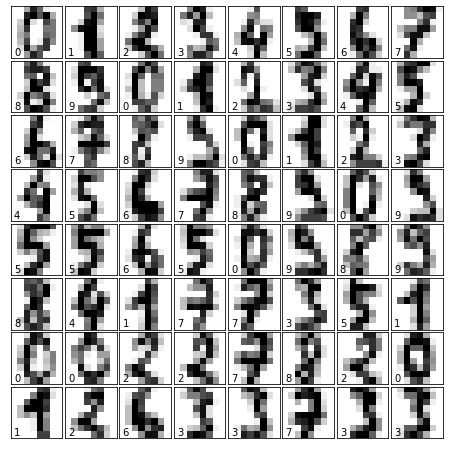

In [14]:
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size(width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    # Display an image at the i - th position
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

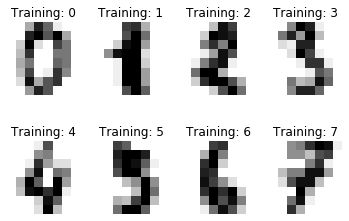

In [17]:
# Another way of visualizing it
# Import matplotlib
import matplotlib.pyplot as plt

# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

In [18]:
### Visualizing Your Data : Principal Component Analysis (PCA)

In [23]:
# Import PCA and RandomizedPCA
from sklearn.decomposition import PCA

# Create a Randomized PCA model that takes two components
#randomized_pca = PCA(n_components = 2, )

# Fit and transform the data to the model
#reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model
pca = PCA(n_components = 2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
#print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25946493  21.2749044 ]
 [  7.9576019  -20.76869944]
 [  6.99192569  -9.95601066]
 ...
 [ 10.80129319  -6.96023034]
 [ -4.87210476  12.42394846]
 [ -0.34437368   6.36556682]]


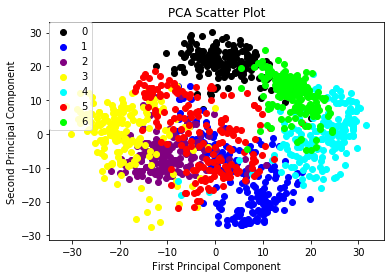

In [28]:
# PCA Scatter Plot
colors = ['black', 'blue', 'purple', 'yellow', 'cyan', 'red', 'lime']
for i in range(len(colors)):
    x = reduced_data_pca[:, 0][digits.target == i]
    y = reduced_data_pca[:, 1][digits.target == i]
    plt.scatter(x, y, c = colors[i])
plt.legend(digits.target_names, loc = 2, borderaxespad = 0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

In [29]:
### Preprocessing Your Data

In [30]:
# Data Normalization
# Import
from sklearn.preprocessing import scale

# Apply 'scale()' to the 'digits' data
data = scale(digits.data)

In [31]:
# Splitting Your Data into Training and Test Sets
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Split the 'digits' data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = \
train_test_split(data, digits.target, digits.images, test_size = 0.25, random_state = 42)

In [32]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out 'n_samples'
print(n_samples)

# Print out 'n_features'
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

# Inspect 'y_train'
print(len(y_train))

1347
64
1347


In [33]:
### Clustering the digits data

In [35]:
# Import the 'cluster' module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init = 'k-means++', n_clusters = 10, random_state = 42)

# Fit the training data 'X_train' to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

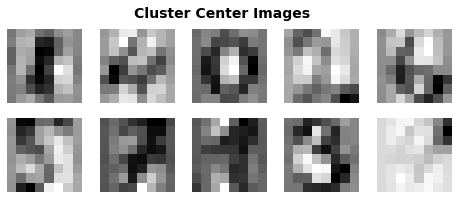

In [36]:
# Visualizing the images
import matplotlib.pyplot as plt

# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize = 14, fontweight = 'bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap = plt.cm.binary)
    # Don't show the axes
    plt.axis('off')
    
# Show the plot
plt.show()

In [37]:
# Predict the labels for 'X_test'
y_pred = clf.predict(X_test)

# Print out the first 100 instances of 'y_pred'
print(y_pred[:100])

# Print out the first 100 instances of 'y_test'
print(y_test[:100])

# Study the shape of the cluster centers
clf.cluster_centers_.shape

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


(10, 64)

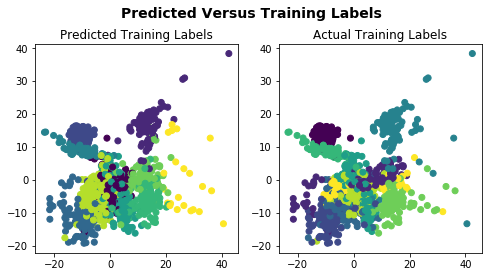

In [40]:
# Import 'Isomap()'
from sklearn.manifold import Isomap

# Create an isomap and fit the 'digits' data to it
X_iso = Isomap(n_neighbors = 10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize = 14, fontweight = 'bold')
fig.subplots_adjust(top = 0.85)

# Add scatterplots to the subplots
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c = clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c = y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

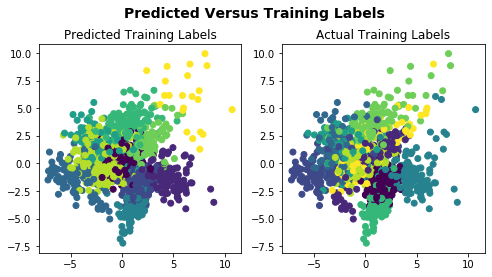

In [41]:
# Import 'PCA()'
from sklearn.decomposition import PCA

# Model and fit the 'digits' data to the PCA model
X_pca = PCA(n_components = 2).fit_transform(X_train)

# Compute the clusters and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize = 14, fontweight = 'bold')
fig.subplots_adjust(top = 0.85)

# Add scatterplots to the subplots
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c = clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c = y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

In [42]:
### Evaluation of Your Clustering Model

In [43]:
# Import 'metrics' from 'sklearn'
from sklearn import metrics

# Print out the confusion matrix with 'confusion_matrix()'
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


In [49]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia   homo   compl   v-meas  ARI   AMI   silhouette')
print('%i        %.3f   %.3f    %.3f    %.3f  %3f   %3f'
     %(clf.inertia_, homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric = 'euclidean')))

inertia   homo   compl   v-meas  ARI   AMI   silhouette
54276        0.688   0.733    0.710    0.567  0.674447   0.146407


/Users/brijrajsinhgohil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
